<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Session 5)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[Decision tree](#dtree)**
2. **[Random forest](#rf)**

**Import the required libraries**

In [2]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

 

#### Load the csv file

In [3]:
# load the csv file
df_employee = pd.read_csv('Employee-Attrition.csv')

# display the first two observations
df_employee.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,41,Yes,Travel_Rarely,Sales,1,Life Sciences,2,Female,3,2,Sales Executive,4,5993,8,Yes,11,3,6
1,49,No,Travel_Frequently,Research & Development,8,Life Sciences,3,Male,2,2,Research Scientist,2,5130,1,No,23,4,10
2,37,Yes,Travel_Rarely,Research & Development,2,Other,4,Male,2,1,Laboratory Technician,3,2090,6,Yes,15,3,0
3,33,No,Travel_Frequently,Research & Development,3,Life Sciences,4,Female,3,1,Research Scientist,3,2909,1,Yes,11,3,8
4,27,No,Travel_Rarely,Research & Development,2,Medical,1,Male,3,1,Laboratory Technician,2,3468,9,No,12,3,2


In [3]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   DistanceFromHome         1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   Gender                   1470 non-null   object
 8   JobInvolvement           1470 non-null   int64 
 9   JobLevel                 1470 non-null   int64 
 10  JobRole                  1470 non-null   object
 11  JobSatisfaction          1470 non-null   int64 
 12  MonthlyIncome            1470 non-null   int64 
 13  NumCompaniesWorked       1470 non-null   int64 
 14  OverTime                 1470 non-null  

In [4]:
df_employee.describe()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,7.008163
std,9.135373,8.106864,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,9.000000
max,60.000000,29.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,40.000000


**Data Preparation**

In [5]:
df_employee.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
YearsAtCompany             0
dtype: int64

In [35]:
df_employee['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [6]:
df_employee['Attrition']=df_employee['Attrition'].apply(lambda x : 1 if x=='Yes' else 0)

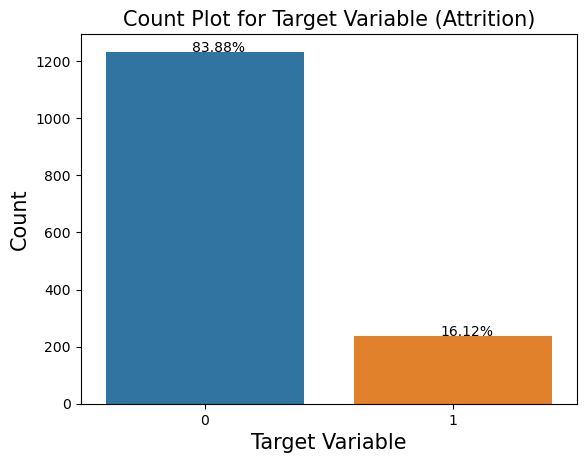

In [7]:
df_target = df_employee['Attrition'].copy()

# get counts of 0's and 1's in the 'Chance of Admit' variable
df_target.value_counts()

# plot the countplot of the variable 'Chance of Admit'
sns.countplot(x = df_target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (Attrition)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Write a code to deal with the imbalanced dataset.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
!pip install imblearn

In [5]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
# Separate features and target variable
X = df_employee.drop('Attrition', axis=1)
y = df_employee['Attrition']

# One-hot encode categorical features
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names(categorical_cols)
X.drop(categorical_cols, axis=1, inplace=True)
X = pd.concat([X, X_encoded], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [6]:
y_train_resampled.value_counts()

No     978
Yes    978
Name: Attrition, dtype: int64

### Let's begin with some hands-on practice exercises

<a id="dtree"> </a>
## 1. Decision tree

## We shall use the employee dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a model to predict whether or not an employee will leave the company based on employee's environment satisfaction and monthly income. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Extract relevant columns
X = df_employee[['EnvironmentSatisfaction', 'MonthlyIncome']]
y = df_employee['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8673469387755102


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Build a full model to predict if an employee will leave the company. Find three features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Accuracy: 0.7755102040816326
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       255
           1       0.14      0.13      0.13        39

    accuracy                           0.78       294
   macro avg       0.50      0.50      0.50       294
weighted avg       0.77      0.78      0.77       294

Top three features:
MonthlyIncome
EnvironmentSatisfaction


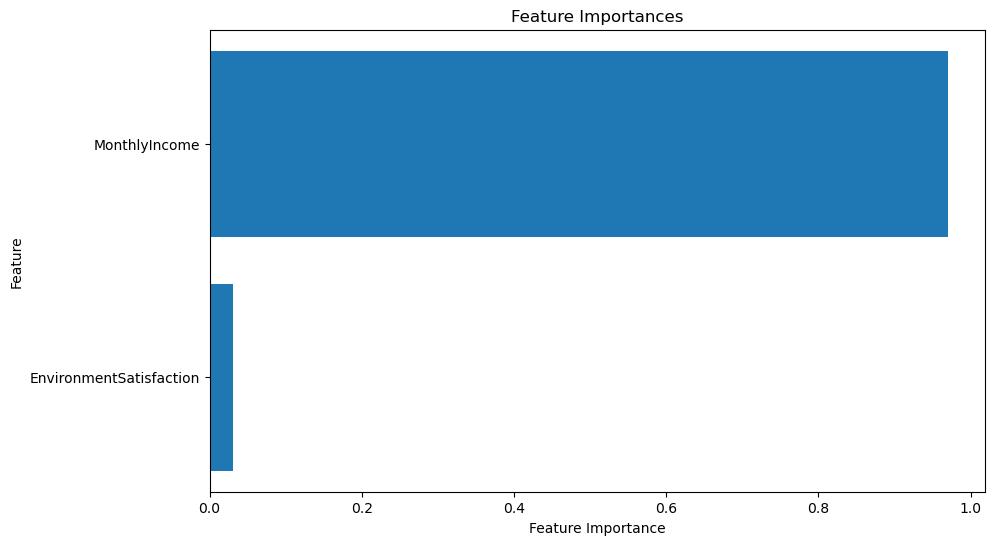

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importances = model.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
top_three_indices = sorted_indices[:3]
top_three_features = X.columns[top_three_indices]
print("Top three features:")
for feature in top_three_features:
    print(feature)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances)
plt.yticks(range(len(feature_importances)), X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4.  Find the area under the receiver operating characteristic curve for full model built in question 3. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
from sklearn.metrics import roc_auc_score

# Calculate the predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_prob)
print("Area under ROC curve:", roc_auc)

Area under ROC curve: 0.5662141779788838


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Plot a confusion matrix for the full model built in Q3.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

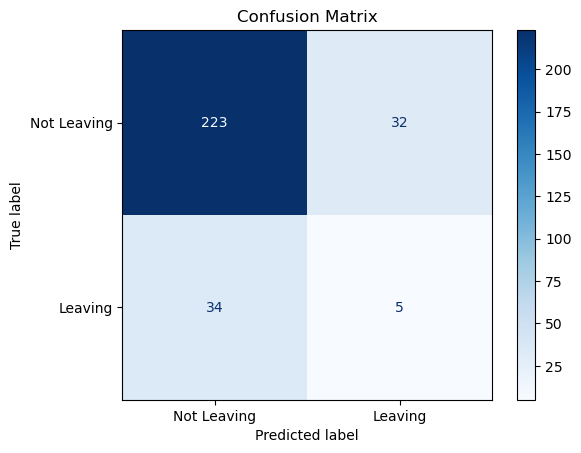

In [14]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot confusion matrix
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, display_labels=['Not Leaving', 'Leaving'])
plt.title('Confusion Matrix')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Calculate the specificity, sensitivity, % of misclassified and correctly classified observations. What can you say about the model by looking at the sensitivity and specificity values? Is this a good model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract values from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate sensitivity and specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Calculate percentage of misclassified and correctly classified observations
misclassified_percent = (FP + FN) / len(y_test) * 100
correctly_classified_percent = (TP + TN) / len(y_test) * 100

print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)
print("Percentage of Misclassified Observations:", misclassified_percent)
print("Percentage of Correctly Classified Observations:", correctly_classified_percent)

Sensitivity (True Positive Rate): 0.1282051282051282
Specificity (True Negative Rate): 0.8745098039215686
Percentage of Misclassified Observations: 22.448979591836736
Percentage of Correctly Classified Observations: 77.55102040816327


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build and plot a decision tree with maximum 5 terminal nodes.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

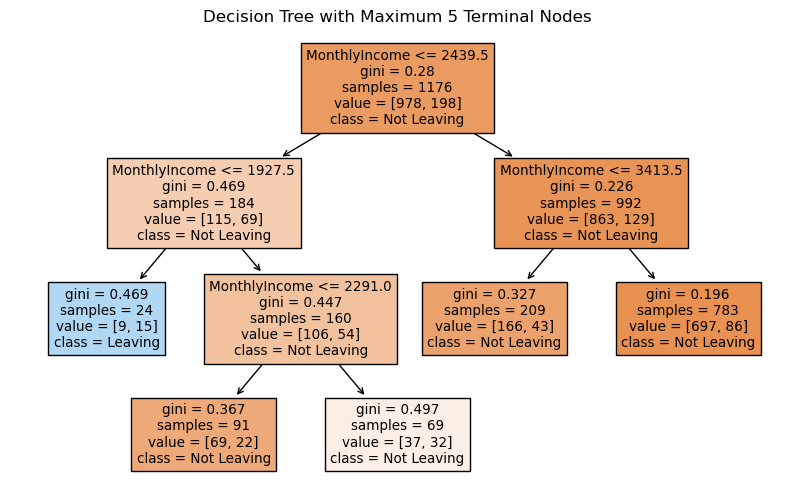

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Build decision tree with maximum 5 terminal nodes
tree_model = DecisionTreeClassifier(max_leaf_nodes=5, random_state=42)
tree_model.fit(X_train, y_train)

# Plot decision tree
plt.figure(figsize=(10, 6))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=['Not Leaving', 'Leaving'])
plt.title("Decision Tree with Maximum 5 Terminal Nodes")
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a Decision Tree model with the predefined parameters and find the average accuracy by performing the 10 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Define the Decision Tree model with predefined parameters
tree_model = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Perform 10-fold cross-validation and calculate the accuracy for each fold
accuracies = cross_val_score(tree_model, X, y, cv=10)

# Calculate the average accuracy
average_accuracy = accuracies.mean()

print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.827891156462585


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. For a decision tree model, find the best value of hyperparameters "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a decision tree classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Instantiate the grid search with 10-fold cross-validation
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=10, scoring='accuracy')

# Perform the grid search
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>10. Build a decision tree model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Define the decision tree model with tuned hyperparameters
tree_model_tuned = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=10, random_state=42)

# Perform 10-fold cross-validation and calculate ROC-AUC score for each fold
roc_auc_scores = cross_val_score(tree_model_tuned, X, y, cv=10, scoring='roc_auc')

# Calculate the average ROC-AUC score
average_roc_auc = roc_auc_scores.mean()

print("Average ROC-AUC Score:", average_roc_auc)

Average ROC-AUC Score: 0.5880315292458674


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Build 5 decision trees each with random 20 features. Also predict the attrition for test set for each model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Define the number of features to select
num_features = 20

# Check if the total number of features is less than the desired number of features
if num_features > X.shape[1]:
    num_features = X.shape[1]

# Initialize a list to store the predicted values for each model
predicted_values = []

# Iterate over 5 decision tree models
for i in range(5):
    # Randomly select features
    selected_features_indices = np.random.choice(range(X.shape[1]), size=num_features, replace=False)
    selected_features = X.columns[selected_features_indices]
    
    # Subset the data with selected features
    X_subset = X[selected_features]
    
    # Build a decision tree model
    tree_model = DecisionTreeClassifier(random_state=42)
    tree_model.fit(X_subset, y)
    
    # Predict the attrition for the test set
    X_test_subset = X_test[selected_features]
    y_pred = tree_model.predict(X_test_subset)
    
    # Append the predicted values to the list
    predicted_values.append(y_pred)

# Convert the list of predicted values to a numpy array
predicted_values = np.array(predicted_values)

# Display the shape of the array (number of models, number of samples)
print("Shape of predicted values array:", predicted_values.shape)

Shape of predicted values array: (5, 294)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Create a new dataframe "model_predictions_df" by appending each prediction made in question 8. There will be 5 columns in the dataframe for each prediction using the decision tree models built in above question.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
import pandas as pd

# Define the column names for the DataFrame
column_names = [f"Model_{i+1}" for i in range(5)]

# Create the DataFrame with the predictions
model_predictions_df = pd.DataFrame(predicted_values.T, columns=column_names)

# Display the DataFrame
print(model_predictions_df)

     Model_1  Model_2  Model_3  Model_4  Model_5
0          0        0        0        0        0
1          0        0        0        0        0
2          1        1        1        1        1
3          0        0        0        0        0
4          0        0        0        0        0
5          0        0        0        0        0
6          0        0        0        0        0
7          0        0        0        0        0
8          0        0        0        0        0
9          0        0        0        0        0
10         0        0        0        0        0
11         0        0        0        0        0
12         0        0        0        0        0
13         0        0        0        0        0
14         0        0        0        0        0
15         0        0        0        0        0
16         0        0        0        0        0
17         0        0        0        0        0
18         1        1        1        1        1
19         0        

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a new column "Voted_Result" in the dataframe "model_predictions_df" that contains the maximum occuring value (mode) of the 5 columns in the dataframe (row-wise).<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# Calculate the mode along the row axis
voted_result = model_predictions_df.mode(axis=1)[0]

# Add the "Voted_Result" column to the DataFrame
model_predictions_df['Voted_Result'] = voted_result

# Display the updated DataFrame
print(model_predictions_df)

     Model_1  Model_2  Model_3  Model_4  Model_5  Voted_Result
0          0        0        0        0        0             0
1          0        0        0        0        0             0
2          1        1        1        1        1             1
3          0        0        0        0        0             0
4          0        0        0        0        0             0
5          0        0        0        0        0             0
6          0        0        0        0        0             0
7          0        0        0        0        0             0
8          0        0        0        0        0             0
9          0        0        0        0        0             0
10         0        0        0        0        0             0
11         0        0        0        0        0             0
12         0        0        0        0        0             0
13         0        0        0        0        0             0
14         0        0        0        0        0       

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Consider the values of "Voted_Result" as our new predictions and store its values in a variable "new_y_pred" and find the accuracy and the roc-auc score using new_y_pred.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# Extract the "Voted_Result" column from the DataFrame
voted_result_predictions = model_predictions_df['Voted_Result']

# Store the values of "Voted_Result" in the variable new_y_pred
new_y_pred = voted_result_predictions.values

# Calculate the accuracy using new_y_pred
accuracy = accuracy_score(y_test, new_y_pred)

# Calculate the ROC-AUC score using new_y_pred
roc_auc = roc_auc_score(y_test, new_y_pred)

print("Accuracy using Voted_Result:", accuracy)
print("ROC-AUC score using Voted_Result:", roc_auc)

Accuracy using Voted_Result: 0.9931972789115646
ROC-AUC score using Voted_Result: 0.9743589743589743


<a id="rf"> </a>
## 2. Random Forest

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a random forest full model to predict if an employee will leave the company or not and generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the random forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       255
           1       0.14      0.13      0.13        39

    accuracy                           0.78       294
   macro avg       0.50      0.50      0.50       294
weighted avg       0.77      0.78      0.77       294



In [25]:
# Initialize the random forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

ValueError: X has 2 features, but RandomForestClassifier is expecting 30 features as input.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. For a random forest model, find the best value of hyperparameters "n_estimators", "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split an internal node
}

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Instantiate the RandomizedSearchCV with 10-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10, cv=10, scoring='accuracy', random_state=42)

# Perform the random search
random_search.fit(X, y)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'max_depth': 10, 'criterion': 'entropy'}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Build a random forest model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Define the Random Forest classifier with the tuned hyperparameters
rf_model_tuned = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                         criterion=best_params['criterion'],
                                         max_depth=best_params['max_depth'],
                                         min_samples_split=best_params['min_samples_split'],
                                         random_state=42)

# Perform 10-fold cross-validation and calculate ROC-AUC scores
roc_auc_scores = cross_val_score(rf_model_tuned, X, y, cv=10, scoring='roc_auc')

# Calculate the average ROC-AUC score
avg_roc_auc_score = roc_auc_scores.mean()

print("Average ROC-AUC score:", avg_roc_auc_score)

Average ROC-AUC score: 0.6233126945575206


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Using the tuned random forest model, find the features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
# Train the tuned Random Forest model
rf_model_tuned.fit(X, y)

# Get feature importances
feature_importances = rf_model_tuned.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features impacting the model prediction the most
print("Top features impacting the model prediction the most:")
print(feature_importance_df)

Top features impacting the model prediction the most:
                   Feature  Importance
1            MonthlyIncome    0.941128
0  EnvironmentSatisfaction    0.058872


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Build a random forest model using the top 10 most important features.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
top_features = feature_importance_df.head(10)['Feature'].tolist()

# Select only the top 10 features from the dataset
X_top_features = X[top_features]

# Initialize a new Random Forest classifier
rf_model_top_features = RandomForestClassifier(random_state=42)

# Train the model using only the top 10 features
rf_model_top_features.fit(X_top_features, y)

RandomForestClassifier(random_state=42)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Extract the names of the top 10 most important features
top_features = feature_importance_df.head(10)['Feature'].tolist()

# Select only the top 10 features from the dataset
X_top_features = X[top_features]

# Split the dataset into training and testing sets
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=42)

# Initialize a new Random Forest classifier
rf_model_top_features = RandomForestClassifier(random_state=42)

# Train the model using only the top 10 features
rf_model_top_features.fit(X_train_top, y_train)

RandomForestClassifier(random_state=42)

In [34]:
print(rf_model_top_features)

RandomForestClassifier(random_state=42)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Plot a confusion matrix and area under the receiver operating characteristic curve for the model built in question 19. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

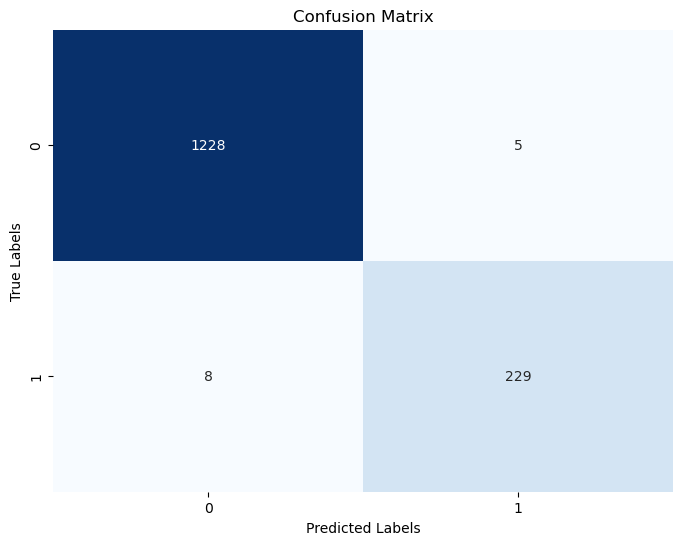

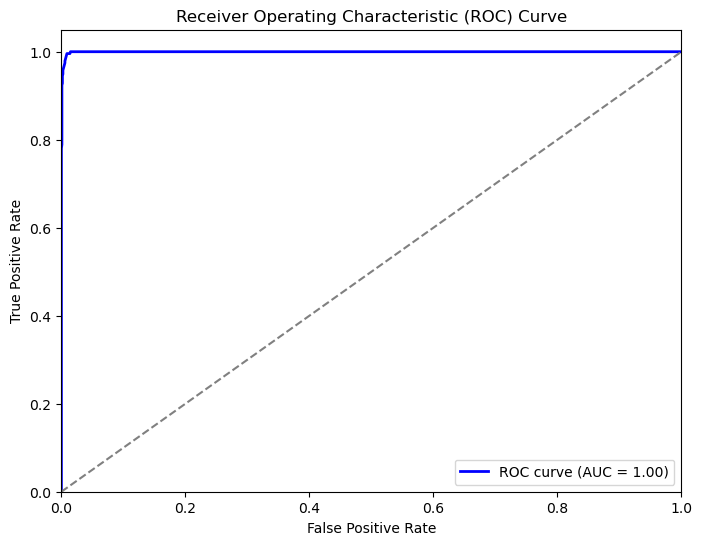

In [32]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Make predictions using the model
y_pred_top_features = rf_model_top_features.predict(X_top_features)

# Step 2: Calculate the confusion matrix
conf_matrix = confusion_matrix(y, y_pred_top_features)

# Step 3: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Step 4: Calculate the probabilities for each class
y_prob_top_features = rf_model_top_features.predict_proba(X_top_features)[:, 1]

# Step 5: Calculate the ROC-AUC score
roc_auc = roc_auc_score(y, y_prob_top_features)

# Step 6: Plot the ROC curve
fpr, tpr, _ = roc_curve(y, y_prob_top_features)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# type your code here